In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
df = pd.read_excel("data/my_ts.xlsx")

In [34]:
df.set_index("date", inplace=True)

In [35]:
from arml import unit_root_test, plot_PACF_ACF, cat_forecaster

In [36]:
unit_root_test(df["electricity"], method="ADF")

ADF p-value: 0.009384 and data is stationary at 5% significance level


(0.009383682866887066, None)

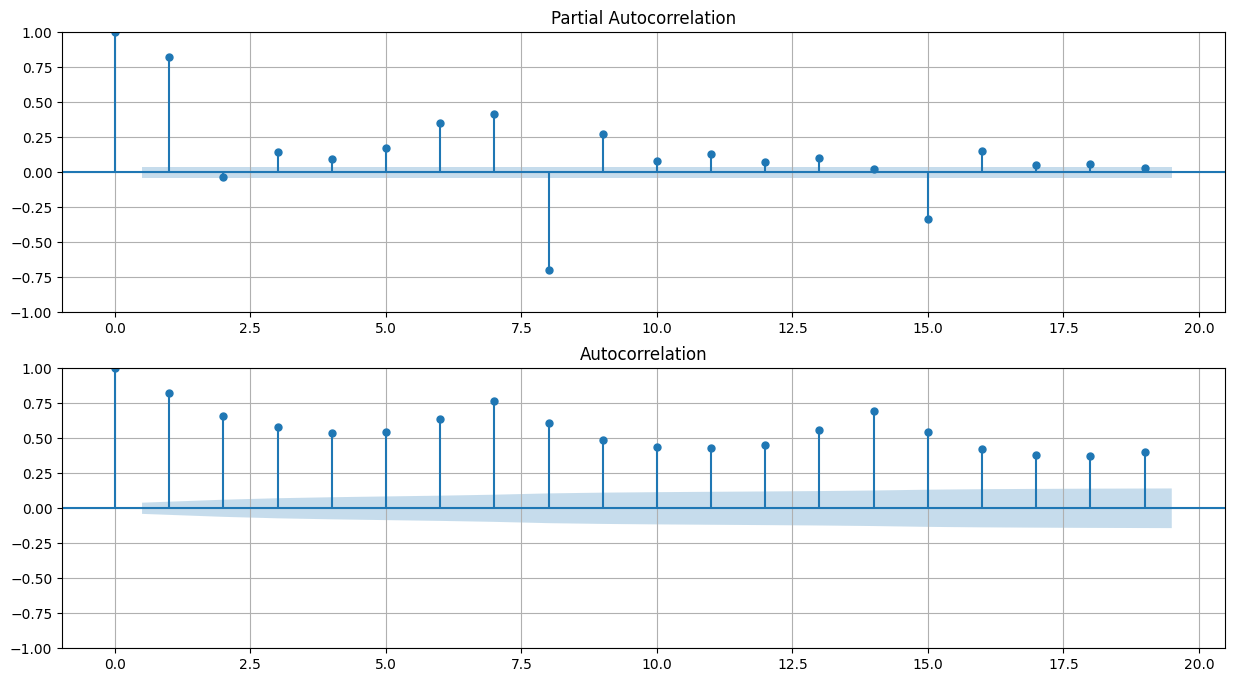

In [37]:
plot_PACF_ACF(df["electricity"], lag_num=19)

In [38]:
my_cat = cat_forecaster(n_lag=21, target_col="electricity", cat_variables=["month", "week_day"])

In [39]:
train_d, test_x, test_y = df[:-60], df[-60:].iloc[:,1:], df[-60:]["electricity"]

In [40]:
model_default = my_cat.fit_cat(df=train_d,param = {"iterations":100})

Learning rate set to 0.304079
0:	learn: 76655.2104212	total: 41.1ms	remaining: 4.07s
1:	learn: 63849.3228943	total: 82.2ms	remaining: 4.03s
2:	learn: 54895.7218530	total: 122ms	remaining: 3.95s
3:	learn: 48723.7557394	total: 158ms	remaining: 3.8s
4:	learn: 44761.5033805	total: 204ms	remaining: 3.88s
5:	learn: 40023.6062339	total: 243ms	remaining: 3.8s
6:	learn: 36603.1401041	total: 284ms	remaining: 3.78s
7:	learn: 34633.0254520	total: 329ms	remaining: 3.78s
8:	learn: 33171.6337552	total: 373ms	remaining: 3.77s
9:	learn: 31545.9722293	total: 415ms	remaining: 3.73s
10:	learn: 30388.4825856	total: 458ms	remaining: 3.71s
11:	learn: 29673.1586772	total: 502ms	remaining: 3.68s
12:	learn: 28880.0807199	total: 548ms	remaining: 3.67s
13:	learn: 28450.4144723	total: 595ms	remaining: 3.65s
14:	learn: 27837.2242765	total: 639ms	remaining: 3.62s
15:	learn: 27580.0587908	total: 686ms	remaining: 3.6s
16:	learn: 27015.3882221	total: 731ms	remaining: 3.57s
17:	learn: 26529.3199245	total: 778ms	remainin

In [41]:
my_preds = my_cat.cat_forecast(model_default, n_ahead=len(test_x), x_test=test_x)

In [42]:
((np.array(test_y)-my_preds)/test_y).mean()*100

9.655186712125994

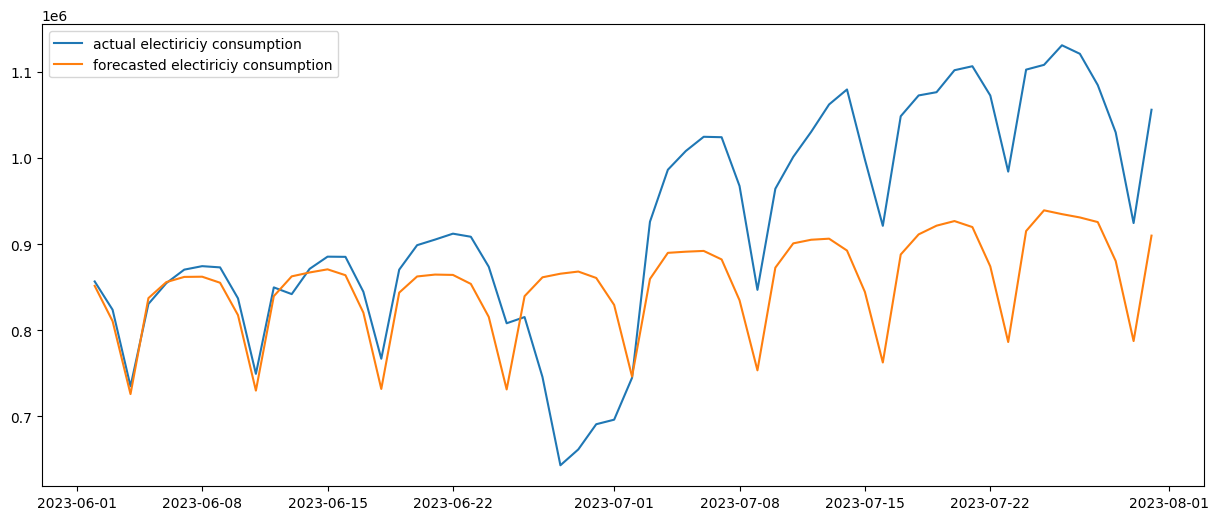

In [15]:
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(test_y.index,test_y, label = "actual electiriciy consumption", color = "C0")
ax.plot(test_y.index, my_preds, label = "forecasted electiriciy consumption", color = "C1")
plt.legend(loc="upper left")
plt.show()

In [30]:
tunned_cat = cat_forecaster(n_lag=21, target_col="electricity", cat_variables=["month", "week_day"])

In [31]:
tunned_cat.tune_model(df=train_d, cv_split=5, test_size=30)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

job exception: Invalid type for cat_feature[non-default value idx=0,feature_idx=0]=899917.03 : cat_features must be integer or string, real number values and NaN values should be converted to string.



  0%|          | 0/100 [01:19<?, ?trial/s, best loss=?]


CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=0]=899917.03 : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [22]:
train_d.iloc[:, 1:]

,month,week_day
date,,
2017-01-01,January,Sunday
2017-01-02,January,Monday
2017-01-03,January,Tuesday
2017-01-04,January,Wednesday
2017-01-05,January,Thursday
...,...,...
2023-05-28,May,Sunday
2023-05-29,May,Monday
2023-05-30,May,Tuesday
